# Navigate the logical structure of a model
with the Python package Modelflow<br>
Using Jupyter notebook, networkx, graphviz, pandas, Plotly, Dash  and  DashInteractiveGraphviz

# Logical structure and attribution. 
The logical structure can be viewed as a [directed graph](https://en.wikipedia.org/wiki/Directed_graph). 

 - Modelflows modelclass extracts the left hand side and all right hand side variables 
 - Modelflows modelclass calculate the attribution to scenario impact from each right hand side variable. 
 - The Python package [networkx](https://networkx.org/) is used to store and analyze the directed graph 
 - The program [Graphviz](https://graphviz.org/) is used to draw nice looking graphs from scripts in the dot language
 - The model class writes dot scripts based on the Networkx directed graphs.  
 - Dash is used to display the structure/attibution dashboard
 - DashInteractiveGraphviz is used to display the graph in the dashboard 

## Background

An introduction to causal analysis of models can be found in {cite:author}`kogiku1968` a more elaborate text is here {cite:author}`Berndsen1995`.

## Import the model class
This class incorporates most of the methods used to manage a model. 

In [1]:
 %load_ext autoreload
 %autoreload 2


In [2]:
from modelclass import model 



# Specify a simple model (Solow growth model) 

In [3]:
fsolow = '''\
Income          = a  * capital**alfa * labor **(1-alfa) 
Consumption     = (1-SAVING_RATIO)  * Income 
Investment      = Income - consumption 
diff(capital)   = Investment-depreciates_rate * capital(-1)
diff(labor)     = labor_growth * labor(-1) 
capital_intense = capital/Labor 
'''

 - (-1) after a variable name is the variable lagged by one year 
 - DIFF(capital) is translated to  Δ𝑐𝑎𝑝𝑖𝑡𝑎𝑙  which is capital-capital(-1)

# Create a model class instance

In [4]:
msolow = model.from_eq(fsolow,modelname='Solow model')

```model.from_eq``` is a function which translates the model specification (fsolow) to a Python object of 
the Modelflow model class.<br>
Now ```msolow``` has many useful properties. 

# The model
Two views

In [5]:
msolow.print_model

FRML <> INCOME          = A  * CAPITAL**ALFA * LABOR **(1-ALFA)  $
FRML <> CONSUMPTION     = (1-SAVING_RATIO)  * INCOME  $
FRML <> INVESTMENT      = INCOME - CONSUMPTION  $
FRML <> CAPITAL=CAPITAL(-1)+(INVESTMENT-DEPRECIATES_RATE * CAPITAL(-1))$
FRML <> LABOR=LABOR(-1)+(LABOR_GROWTH * LABOR(-1))$
FRML <> CAPITAL_INTENSE = CAPITAL/LABOR  $


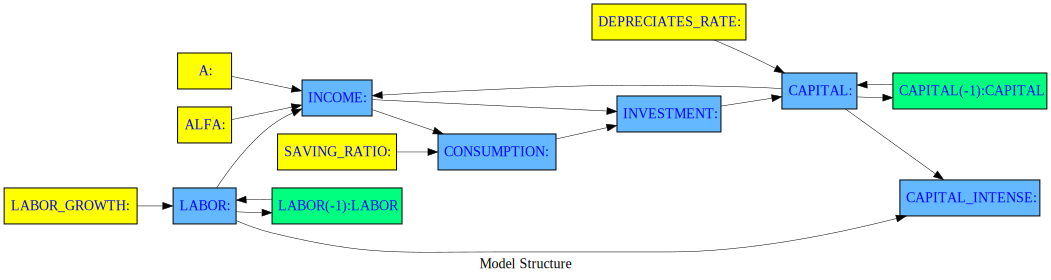

In [6]:
msolow.drawmodel( title="Model Structure",size=(20,20))

# As adjacency matrix 

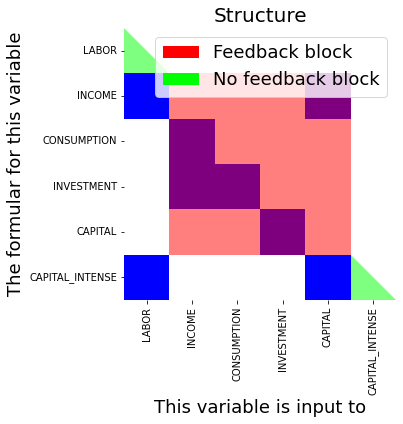

In [7]:
msolow.plotadjacency();

# Now lets look at a larger model 

# Load a model, lock, stock, and barrel
A World Bank Model for Pakistan.<br>
The file `pak.pcim` contains a dump of model equations, dataframe, simulation options and variable descriptions 

In [8]:
mpak,baseline = model.modelload('../../models/pak.pcim',run=1,silent=1)

In [9]:
mpak.print_model

FRML  <> PAKNVINDMNFSKN = PAKNVINDOTHRTKN+PAKNVINDENGYSKN $
FRML  <> PAKNVINDMNFSCN = PAKNVINDOTHRTCN+PAKNVINDENGYSCN $
FRML  <> PAKNVINDMNFSXN = PAKNVINDMNFSCN/PAKNVINDMNFSKN $
FRML  <> PAKCRPSINTKN = PAKBETAENGYCRPS*PAKNVAGRCRPSKN*(1+((PAKBETACRPS+PAKBETAENGYCRPS)/(1-(PAKBETACRPS+PAKBETAENGYCRPS)))) $
FRML  <> PAKCRPSINTCN = PAKBETAENGYCRPS*PAKNVAGRCRPSCN*(1+((PAKBETACRPS+PAKBETAENGYCRPS)/(1-(PAKBETACRPS+PAKBETAENGYCRPS)))) $
FRML  <> PAKFSTYINTKN = PAKBETAENGYFSTY*PAKNVAGRFSTYKN*(1+((PAKBETAFSTY+PAKBETAENGYFSTY)/(1-(PAKBETAFSTY+PAKBETAENGYFSTY)))) $
FRML  <> PAKFSTYINTCN = PAKBETAENGYFSTY*PAKNVAGRFSTYCN*(1+((PAKBETAFSTY+PAKBETAENGYFSTY)/(1-(PAKBETAFSTY+PAKBETAENGYFSTY)))) $
FRML  <> PAKFSNGINTKN = PAKBETAENGYFSNG*PAKNVAGRFSNGKN*(1+((PAKBETAFSNG+PAKBETAENGYFSNG)/(1-(PAKBETAFSNG+PAKBETAENGYFSNG)))) $
FRML  <> PAKFSNGINTCN = PAKBETAENGYFSNG*PAKNVAGRFSNGCN*(1+((PAKBETAFSNG+PAKBETAENGYFSNG)/(1-(PAKBETAFSNG+PAKBETAENGYFSNG)))) $
FRML  <> PAKMNGSINTKN = PAKBETAENGYMNGS*PAKNVINDMNGSKN*(1+((

## Create a dataframe where emission tax is set to 29
Baseline is the dataframe loaded from file<br>
model.update is a function to update variables (series) in the dataframe  

In [10]:
nominal_carbon_tax = model.update(baseline,'''
<2024  2100>            # Set time for updates 
PAKGGREVCO2CER  = 29    # Coal CO2 tax set to 29 
PAKGGREVCO2GER  = 29    # Gas CO2 tax set to 29 
PAKGGREVCO2OER = 29     # Oil CO2 tax set to 29 
''')

## Run the model with the baseline and with the nominal tax 

In [11]:
res_nominal  = mpak(nominal_carbon_tax,2025,2040,alfa = 0.7)

# The model structure is messy  

In [12]:
# mpak.drawmodel(browser=1)

In [13]:
mpak.modeldash('PAKNYGDPMKTPKN',jupyter=True)  

apprun
Dash app running on http://127.0.0.1:5001/


Dash_graph(mmodel=<
Model name                              :            pak model 
Model structure                         :         Simultaneous 
Number of variables                     :                  841 
Number of exogeneous  variables         :                  463 
Number of endogeneous variables         :                  378 
>, pre_var='PAKNYGDPMKTPKN', filter=0, up=1, down=0, time_att=False, attshow=False, all=False, dashport=5001, debug=False, jupyter=True, show_trigger=False, inline=False, lag=False, threshold=0.5, growthshow=False)